In [1]:
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
     keras.datasets.fashion_mnist.load_data()

In [2]:
# 정규화 0~1
train_scaled = train_input / 255.0

# 훈련세트, 검증 세트 
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [5]:
# 층을 구성하는 함수
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28, 28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))

    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [6]:
model = model_fn()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- mode.fit() : verbose - 0: 출력 X, 1: 학습 진행율, 정확도, 로스,에포크, 2: 정확도, 로스, 에포크

In [7]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7642 - loss: 0.6816
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8562 - loss: 0.4059
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8687 - loss: 0.3640
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8811 - loss: 0.3287
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8876 - loss: 0.3129


In [8]:
hist.history

{'accuracy': [0.8133541941642761,
  0.8599374890327454,
  0.8718541860580444,
  0.8809375166893005,
  0.8860833048820496],
 'loss': [0.5327653288841248,
  0.3920510709285736,
  0.35573461651802063,
  0.33210596442222595,
  0.3167628347873688]}

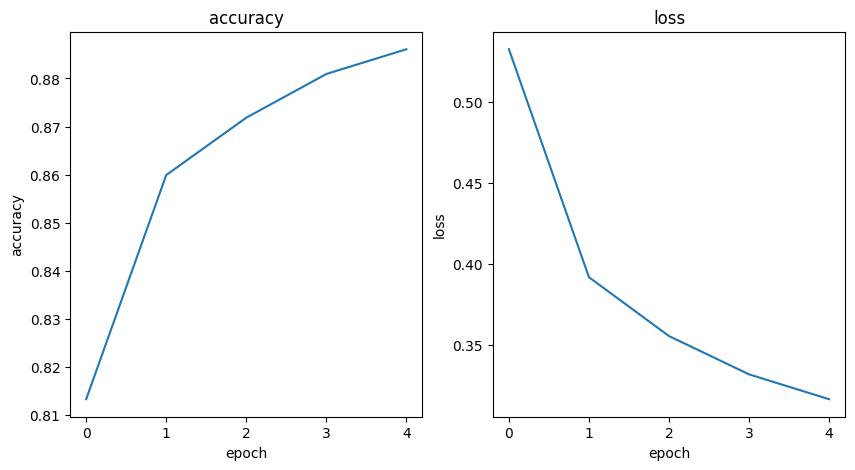

In [11]:
# 정확도, 로스 
import matplotlib.pyplot as plt
_, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(hist.history['accuracy'])
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('accuracy')
axs[0].set_title('accuracy')

axs[1].plot(hist.history['loss'])
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('loss')
axs[1].set_title('loss')

plt.show()



In [ ]:
# 검증 손실 
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=5, validation_data=(val_scaled, val_target))